In [1]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay#,roc_curve, RocCurveDisplay, roc_auc_score,
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
ground_truth_data_path = os.path.join('..', 'data')
results_path = os.path.join('..', 'results')

aggregated_results = 'model_agg_results.csv'

In [3]:
def compute_metrics_alt(df):
    actual = df['person_actual']
    predicted = df['person_classified']
    labels = sorted(list(set(actual.unique()).union(set(predicted.unique()))))

    # Calculate metrics
    acc = accuracy_score(actual, predicted)
    precision_mac = precision_score(actual, predicted, labels=labels, average='macro', zero_division=0)
    recall_mac = recall_score(actual, predicted, labels=labels, average='macro', zero_division=0)
    f1_mac = f1_score(actual, predicted, labels=labels, average='macro', zero_division=0)
    precision_weight = precision_score(actual, predicted, labels=labels, average='weighted', zero_division=0)
    recall_weight = recall_score(actual, predicted, labels=labels, average='weighted', zero_division=0)
    f1_weight = f1_score(actual, predicted, labels=labels, average='weighted', zero_division=0)
    
    return {
        'Accuracy': acc,
        'Precision (Macro)': precision_mac,
        'Precision (Weighted)': precision_weight,
        'Recall (Macro)': recall_mac,
        'Recall (Weighted)': recall_weight,
        'F1 Score (Macro)': f1_mac,
        'F1 Score (Weighted)': f1_weight,
    }

In [4]:
# Function to compute pooled metrics for the entire set of models
def compute_pooled_metrics_alt(actual, predicted, model_name):
    labels = sorted(list(set(actual).union(set(predicted))))
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(actual, predicted),
        'Precision (Macro)': precision_score(actual, predicted, average='macro', labels=labels, zero_division=0),
        'Precision (Weighted)': precision_score(actual, predicted, average='weighted', labels=labels, zero_division=0),
        'Recall (Macro)': recall_score(actual, predicted, average='macro', labels=labels, zero_division=0),
        'Recall (Weighted)': recall_score(actual, predicted, average='weighted', labels=labels, zero_division=0),
        'F1 Score (Macro)': f1_score(actual, predicted, average='macro', labels=labels, zero_division=0),
        'F1 Score (Weighted)': f1_score(actual, predicted, average='weighted', labels=labels, zero_division=0),
    }

In [5]:
all_metrics = {model: [] for model in ['ArcFace', 'VGG-Face', 'FaceNet-512']}

# Loop through files in the folder
for folder in ['video_1', 'video_2', 'video_13', 'video_15', 'video_19', 'video_20', 'video_1_ml', 'video_2_ml']:
    for model in ['ArcFace', 'VGG-Face', 'FaceNet-512']:
        gt_folder = os.path.join(os.path.join(ground_truth_data_path, folder))
        print(gt_folder)
        print(os.listdir(gt_folder))
        for filename in os.listdir(gt_folder):
            if model.replace('-', '').lower() in filename.lower() and filename.endswith('.csv'):
                df = pd.read_csv(os.path.join(gt_folder, filename))
                metrics = compute_metrics_alt(df)
                all_metrics[model].append(metrics)

summary_data = []
for model, metrics_list in all_metrics.items():
    if metrics_list:
        df_model = pd.DataFrame(metrics_list)
        avg_metrics = df_model.mean().to_dict()
        avg_metrics['Model'] = model
        summary_data.append(avg_metrics)

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df[['Model', 'Accuracy', 'Precision (Macro)', 'Precision (Weighted)', 'Recall (Macro)', 'Recall (Weighted)', 'F1 Score (Macro)', 'F1 Score (Weighted)']]
display(summary_df)
#print(summary_df.to_string(index=False))

..\data\video_1
['video_1_arcface.csv', 'video_1_facenet512.csv', 'video_1_vggface.csv']
..\data\video_1
['video_1_arcface.csv', 'video_1_facenet512.csv', 'video_1_vggface.csv']
..\data\video_1
['video_1_arcface.csv', 'video_1_facenet512.csv', 'video_1_vggface.csv']
..\data\video_2
['video_2_arcface.csv', 'video_2_facenet512.csv', 'video_2_vggface.csv']
..\data\video_2
['video_2_arcface.csv', 'video_2_facenet512.csv', 'video_2_vggface.csv']
..\data\video_2
['video_2_arcface.csv', 'video_2_facenet512.csv', 'video_2_vggface.csv']
..\data\video_13
['video_13_arcface.csv', 'video_13_facenet512.csv', 'video_13_vggface.csv']
..\data\video_13
['video_13_arcface.csv', 'video_13_facenet512.csv', 'video_13_vggface.csv']
..\data\video_13
['video_13_arcface.csv', 'video_13_facenet512.csv', 'video_13_vggface.csv']
..\data\video_15
['video_15_arcface.csv', 'video_15_facenet512.csv', 'video_15_vggface.csv']
..\data\video_15
['video_15_arcface.csv', 'video_15_facenet512.csv', 'video_15_vggface.csv']
.

,Model,Accuracy,Precision (Macro),Precision (Weighted),Recall (Macro),Recall (Weighted),F1 Score (Macro),F1 Score (Weighted)
0,ArcFace,0.969576,0.732174,0.976211,0.790625,0.969576,0.743851,0.971162
1,VGG-Face,0.982166,0.730389,0.987105,0.798854,0.982166,0.742522,0.983952
2,FaceNet-512,0.987823,0.734009,0.994276,0.803774,0.987823,0.746262,0.990828


In [6]:
model_names = ['ArcFace', 'VGG-Face', 'FaceNet-512']

all_actual = {model: [] for model in model_names}
all_predicted = {model: [] for model in model_names}

ground_truth_data_path = os.path.join('..', 'data')

for folder in ['video_1', 'video_2', 'video_13', 'video_15', 'video_19', 'video_20', 'video_1_ml', 'video_2_ml']:
    for model in model_names:
        model_id = model.replace('-', '').lower()
        gt_folder = os.path.join(os.path.join(ground_truth_data_path, folder))
        print(gt_folder)
        print(os.listdir(gt_folder))
        for filename in os.listdir(gt_folder):
            if model_id in filename.lower() and filename.endswith('.csv'):
                df = pd.read_csv(os.path.join(gt_folder, filename))
                all_actual[model].extend(df['person_actual'])
                all_predicted[model].extend(df['person_classified'])

# Aggregate all models into a DataFrame
summary_data = [
    compute_pooled_metrics_alt(all_actual[model], all_predicted[model], model)
    for model in model_names if all_actual[model]
]

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df[['Model', 'Accuracy', 'Precision (Macro)', 'Precision (Weighted)', 'Recall (Macro)', 'Recall (Weighted)', 'F1 Score (Macro)', 'F1 Score (Weighted)']]

# Display the results
display(summary_df)

..\data\video_1
['video_1_arcface.csv', 'video_1_facenet512.csv', 'video_1_vggface.csv']
..\data\video_1
['video_1_arcface.csv', 'video_1_facenet512.csv', 'video_1_vggface.csv']
..\data\video_1
['video_1_arcface.csv', 'video_1_facenet512.csv', 'video_1_vggface.csv']
..\data\video_2
['video_2_arcface.csv', 'video_2_facenet512.csv', 'video_2_vggface.csv']
..\data\video_2
['video_2_arcface.csv', 'video_2_facenet512.csv', 'video_2_vggface.csv']
..\data\video_2
['video_2_arcface.csv', 'video_2_facenet512.csv', 'video_2_vggface.csv']
..\data\video_13
['video_13_arcface.csv', 'video_13_facenet512.csv', 'video_13_vggface.csv']
..\data\video_13
['video_13_arcface.csv', 'video_13_facenet512.csv', 'video_13_vggface.csv']
..\data\video_13
['video_13_arcface.csv', 'video_13_facenet512.csv', 'video_13_vggface.csv']
..\data\video_15
['video_15_arcface.csv', 'video_15_facenet512.csv', 'video_15_vggface.csv']
..\data\video_15
['video_15_arcface.csv', 'video_15_facenet512.csv', 'video_15_vggface.csv']
.

,Model,Accuracy,Precision (Macro),Precision (Weighted),Recall (Macro),Recall (Weighted),F1 Score (Macro),F1 Score (Weighted)
0,ArcFace,0.969302,0.683476,0.973796,0.908696,0.969302,0.705215,0.971202
1,VGG-Face,0.980597,0.692018,0.985263,0.916806,0.980597,0.713526,0.982565
2,FaceNet-512,0.986968,0.686990,0.993792,0.923417,0.986968,0.703655,0.990131


In [7]:
# Function which normalises a confusion matrix
def normalize_confusion_matrix(cm, norm='true'):
    if norm == 'true':
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    elif norm == 'pred':
        cm_normalized = cm.astype('float') / cm.sum(axis=0)[np.newaxis, :]
    elif norm == 'all':
        cm_normalized = cm.astype('float') / cm.sum()
    else:
        raise ValueError("Unknown normalization type. Use 'true', 'pred', or 'all'.")
    return cm_normalized

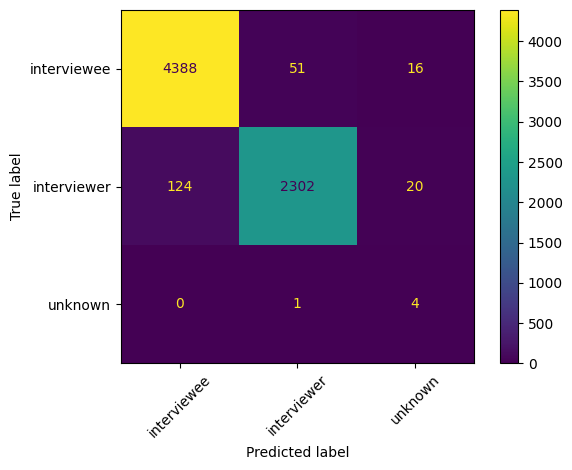

In [8]:
actual = all_actual['ArcFace']
predicted = all_predicted['ArcFace']

# Get unique sorted labels to ensure consistency in the confusion matrix
labels = sorted(list(set(actual).union(set(predicted))))

# Compute the confusion matrix
cm = confusion_matrix(actual, predicted, labels=labels)
#cm_normalized = normalize_confusion_matrix(cm, norm='true')

# Display the confusion matrix with proper labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=labels)
cm_display.plot()
#cm_display.plot(values_format='.3f')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

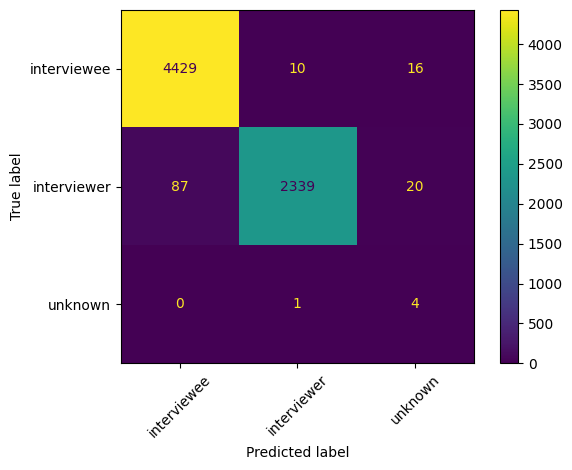

In [9]:
actual = all_actual['VGG-Face']
predicted = all_predicted['VGG-Face']

# Get unique sorted labels to ensure consistency in the confusion matrix
labels = sorted(list(set(actual).union(set(predicted))))

# Compute the confusion matrix
cm = confusion_matrix(actual, predicted, labels=labels)
#cm_normalized = normalize_confusion_matrix(cm, norm='true')

# Display the confusion matrix with proper labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=labels)
cm_display.plot()
#cm_display.plot(values_format='.3f')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

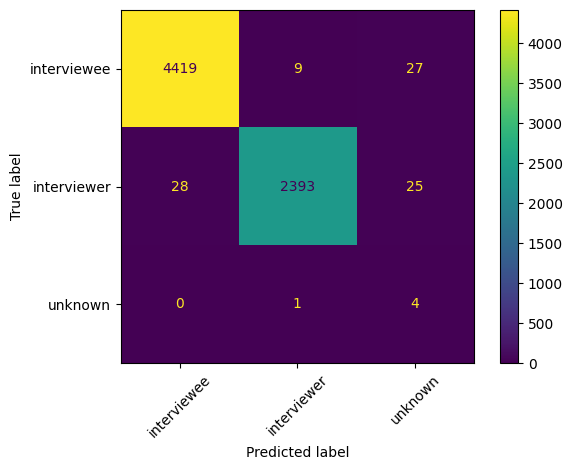

In [10]:
actual = all_actual['FaceNet-512']
predicted = all_predicted['FaceNet-512']

# Get unique sorted labels to ensure consistency in the confusion matrix
labels = sorted(list(set(actual).union(set(predicted))))

# Compute the confusion matrix
cm = confusion_matrix(actual, predicted, labels=labels)
#cm_normalized = normalize_confusion_matrix(cm, norm='true')

# Display the confusion matrix with proper labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=labels)
cm_display.plot()
#cm_display.plot(values_format='.3f')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, average='weighted')
recall = recall_score(actual, predicted, average='weighted')
f1_score_val = f1_score(actual, predicted, average='weighted')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1_score_val:.3f}")

Accuracy: 0.987
Precision: 0.994
Recall: 0.987
F1-Score: 0.990


In [12]:
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, average='macro')
recall = recall_score(actual, predicted, average='macro')
f1_score_val = f1_score(actual, predicted, average='macro')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1_score_val:.3f}")

Accuracy: 0.987
Precision: 0.687
Recall: 0.923
F1-Score: 0.704


In [13]:
aggregated_results_path = os.path.join(results_path, aggregated_results)

summary_df.to_csv(aggregated_results_path, index=False)

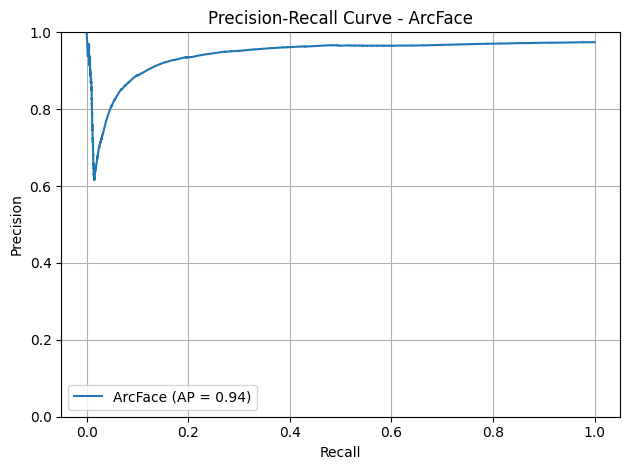

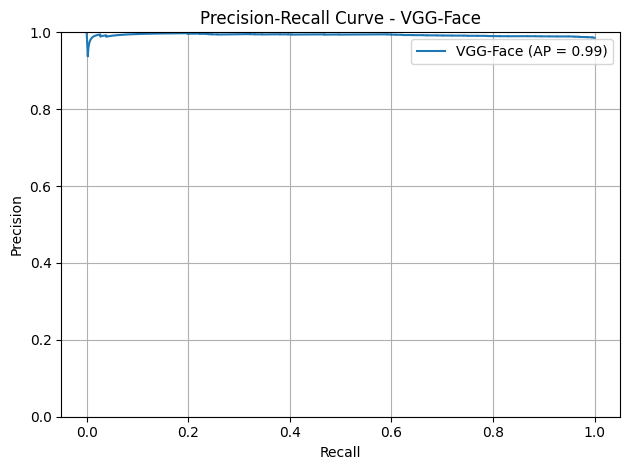

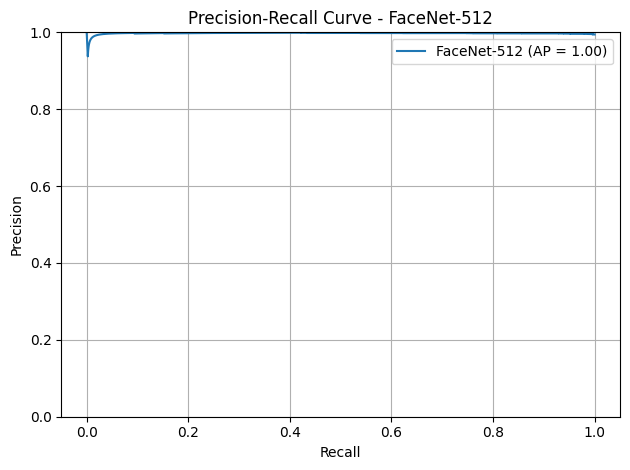

In [14]:
model_names = ['ArcFace', 'VGG-Face', 'FaceNet-512']

# For ROC/PR plotting
scores_dict = {model: [] for model in model_names}
matches_dict = {model: [] for model in model_names}

for folder in ['video_1', 'video_2', 'video_13', 'video_15', 'video_19', 'video_20', 'video_1_ml', 'video_2_ml']:
    for model in model_names:
        model_id = model.replace('-', '').lower()
        gt_folder = os.path.join(ground_truth_data_path, folder)
        for filename in os.listdir(gt_folder):
            if model_id in filename.lower() and filename.endswith('.csv'):
                df = pd.read_csv(os.path.join(gt_folder, filename))
                if 'person_score' in df.columns:  # Only include files with distances
                    df = df.dropna(subset=['person_score'])  # Drop rows with NaN scores
                    match = (df['person_actual'] == df['person_classified']).astype(int)
                    score = -df['person_score']  # Invert distance: lower = better → higher = better
                    matches_dict[model].extend(match)
                    scores_dict[model].extend(score)

# Plotting ROC and PR curves
for model in model_names:
    y_true = matches_dict[model]
    y_score = scores_dict[model]
    if not y_true or not y_score:
        continue

    # ROC Curve
    # fpr, tpr, _ = roc_curve(y_true, y_score)
    # roc_auc = roc_auc_score(y_true, y_score)

    # plt.figure(figsize=(12, 5))

    # plt.subplot(1, 2, 1)
    # plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')
    # plt.plot([0, 1], [0, 1], 'k--')
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title(f'ROC Curve - {model}')
    # plt.legend()
    # plt.grid(True)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    ap = average_precision_score(y_true, y_score)

    #plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{model} (AP = {ap:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model}')
    plt.legend()
    plt.ylim(0.0, 1.0)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

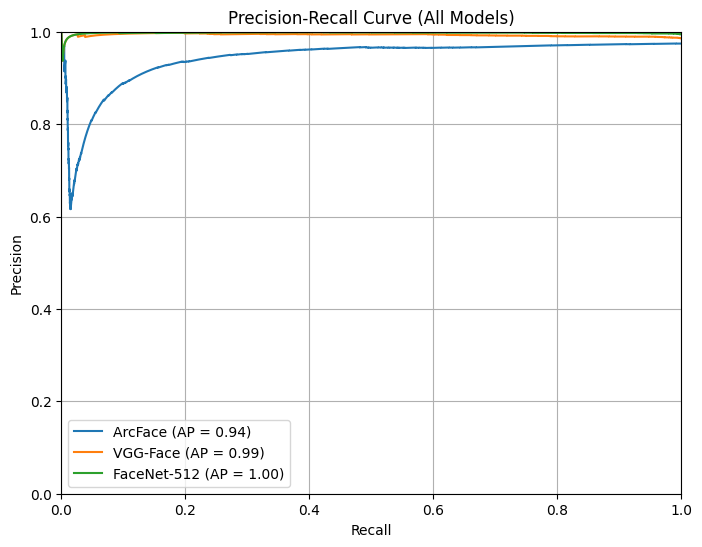

In [15]:
plt.figure(figsize=(8, 6))

for model in model_names:
    y_true = matches_dict[model]
    y_score = scores_dict[model]
    if not y_true or not y_score:
        continue

    precision, recall, _ = precision_recall_curve(y_true, y_score)
    ap = average_precision_score(y_true, y_score)

    plt.plot(recall, precision, label=f'{model} (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (All Models)')
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 1.0)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [16]:
# plt.figure(figsize=(8, 6))

# for model in model_names:
#     y_true = matches_dict[model]
#     y_score = scores_dict[model]
#     if not y_true or not y_score:
#         continue

#     fpr, tpr, _ = roc_curve(y_true, y_score)
#     roc_auc = roc_auc_score(y_true, y_score)

#     plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve (All Models)')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

In [17]:
# Calculate AUC
#roc_auc = roc_auc_score(y_true, [-s for s in y_score])
pr_auc = average_precision_score(y_true, [-s for s in y_score])

#print(f"ROC AUC: {roc_auc:.3f}")
print(f"PR AUC: {pr_auc:.3f}")

PR AUC: 0.985
